In [1]:

%matplotlib nbagg
import h5py as h5
import hyperspy.api as hs
import numpy as np
import scipy
import matplotlib.pyplot as plt


# switch of the too many warnings...
import warnings
warnings.filterwarnings('ignore')

# odemis h5 to hspy function:
from odemishspy import odemis_to_hyperspy
from odemishspy import odemisSEM_to_hyperspy


/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
The Bruker composite file reader can not be loaded because the lxml library is not installed. To enable it install the Python lxml package.


<IPython.core.display.Javascript object>


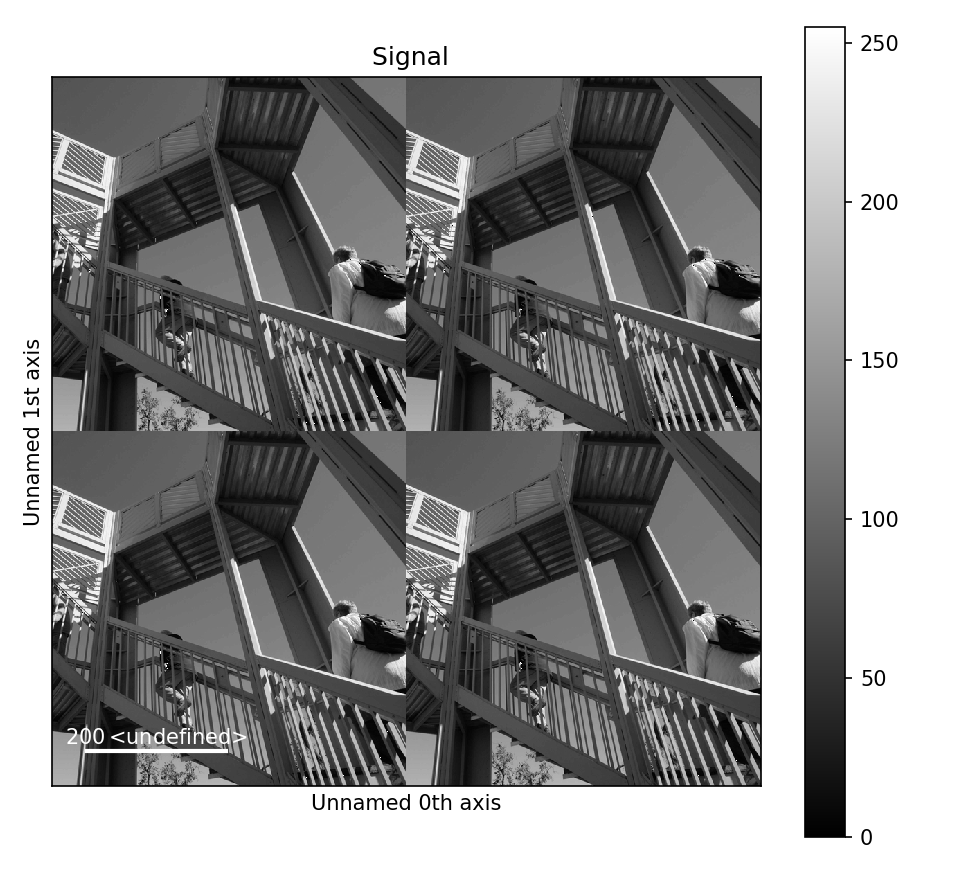

In [2]:
# image mosaic
image = hs.signals.Signal2D(scipy.misc.ascent())
image = hs.stack([hs.stack([image]*2,axis=0)]*2,axis=1)
image.plot()


<IPython.core.display.Javascript object>


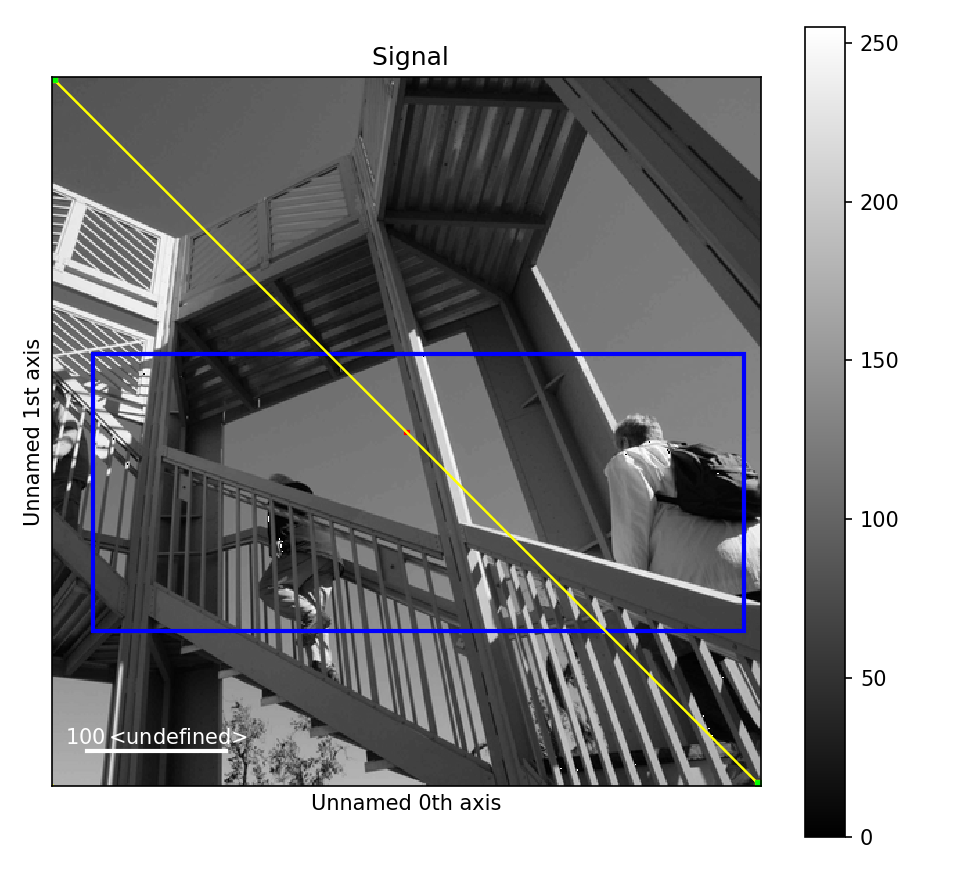

<IPython.core.display.Javascript object>


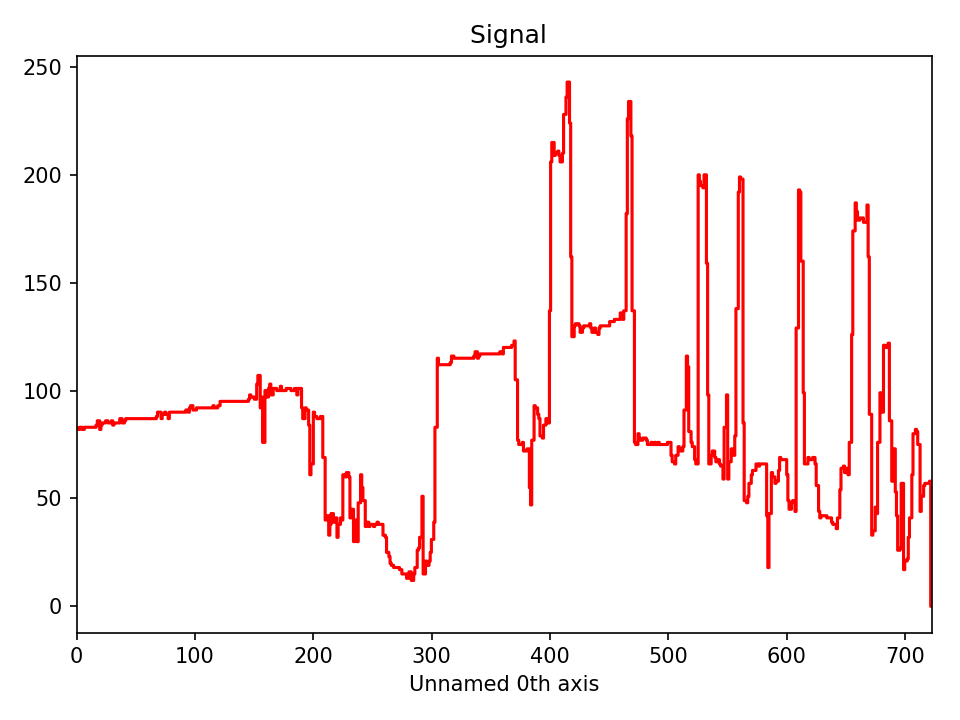

<IPython.core.display.Javascript object>


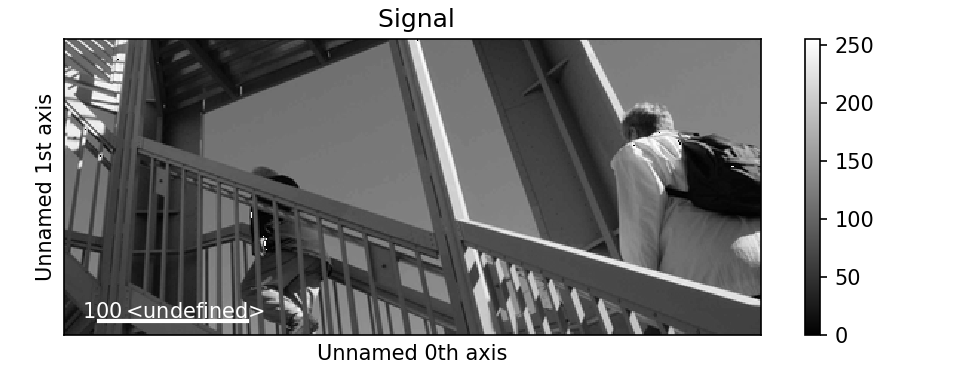

In [3]:
# using ROI's to crop and make linescans
# use the mouse to resize and move the ROI objects
im = hs.signals.Signal2D(scipy.misc.ascent())
rectangular_roi = hs.roi.RectangularROI(left=30, right=500, top=200, bottom=400)
line_roi = hs.roi.Line2DROI(0, 0, 512, 512, 1)
point_roi = hs.roi.Point2DROI(256, 256)
im.plot()
roi2D = rectangular_roi.interactive(im, color="blue")
roi1D = line_roi.interactive(im, color="yellow")
roi0D = point_roi.interactive(im, color="red")
roi1D.plot()
roi2D.plot()

# remember the keyboard shortcuts for nav cursors:

Arrows: change coordinates (nav)

PageUp: Increase step size

PageDown: decrease step size

Numpad + : Increase pointer size

Numpad - : decrease pointer size

h : launch contrast 2D


VBox(children=(HBox(children=(FloatText(value=0.43, description='x1'), FloatText(value=0.88, description='x2'))), HBox(children=(FloatText(value=4.0, description='x2'), FloatText(value=0.54, description='y2'))), FloatText(value=0.1, description='linewidth')))

<IPython.core.display.Javascript object>


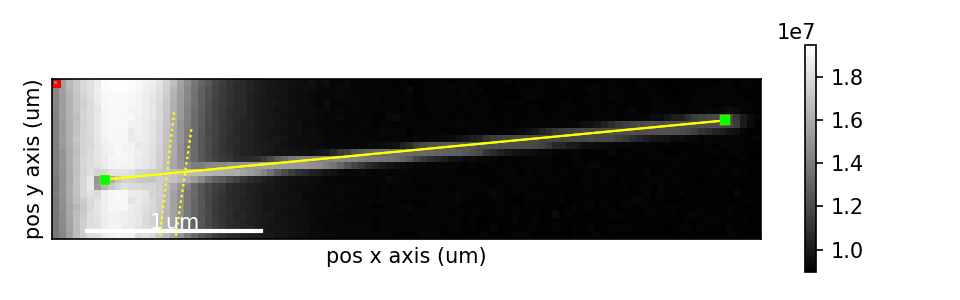

<IPython.core.display.Javascript object>


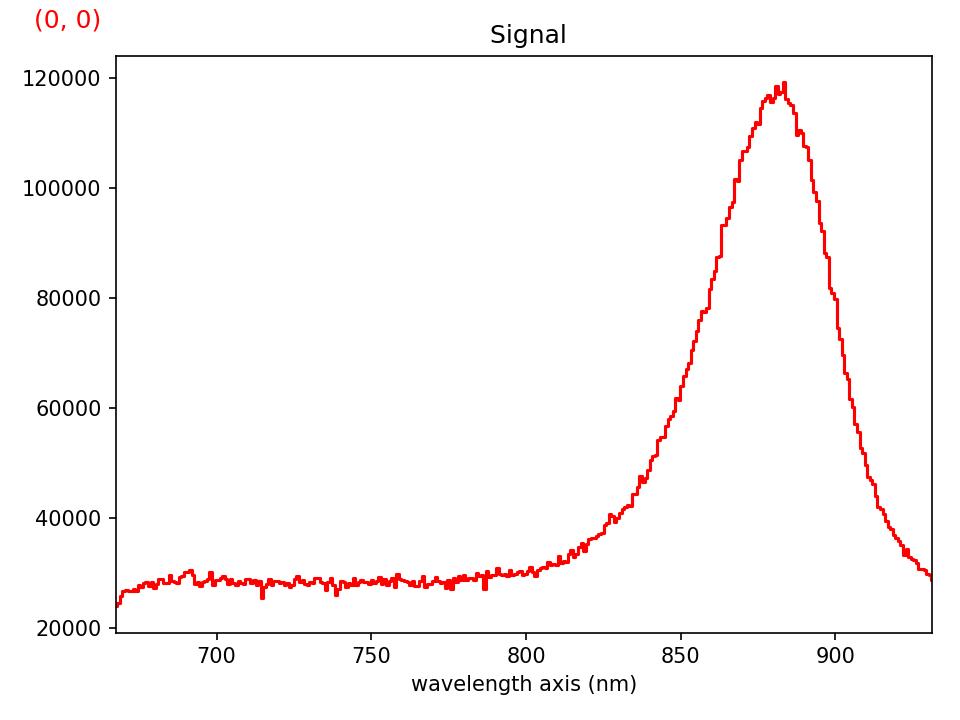

VBox(children=(HBox(children=(Label(value='pos x', layout=Layout(width='15%')), IntSlider(value=0, description='index', max=101), BoundedFloatText(value=0.14638844301765677, continuous_update=True, description='value', max=4.186388443017659, min=0.14638844301765677, step=0.04000000000000002), Label(value='um', layout=Layout(width='5%')))), HBox(children=(Label(value='pos y', layout=Layout(width='15%')), IntSlider(value=0, description='index', max=22), BoundedFloatText(value=0.32022471910112293, continuous_update=True, description='value', max=1.2002247191011235, min=0.32022471910112293, step=0.04000000000000002), Label(value='um', layout=Layout(width='5%')))), Checkbox(value=True, description='Continous update')))

<IPython.core.display.Javascript object>


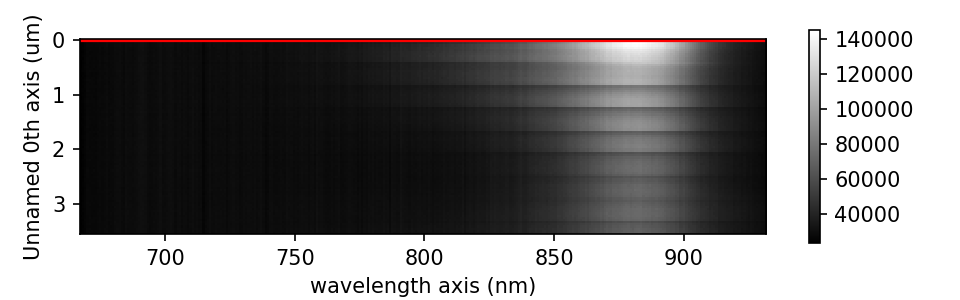

<IPython.core.display.Javascript object>


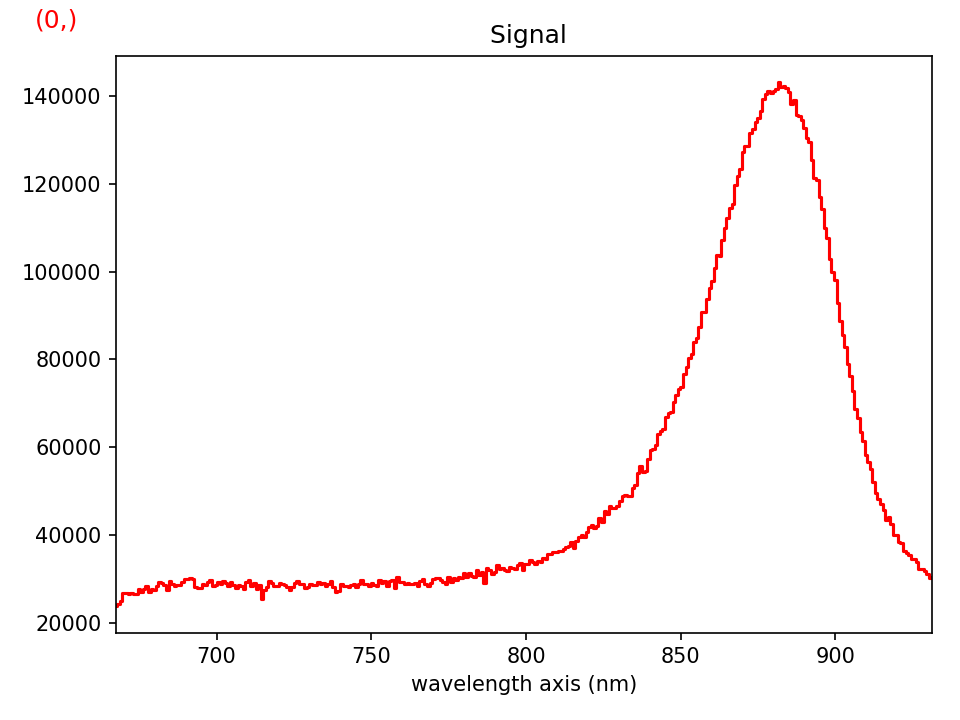

In [4]:

s = hs.load('sampledata/cltest.hspy')
s = s.rebin(scale=[1,1,8]) # reduce data size


line_roi = hs.roi.Line2DROI(0.43, 0.88,4,0.54, 0.1)

line_roi.gui()
s.plot()
s.axes_manager.gui_navigation_sliders()



roi1D = line_roi.interactive(s, color="yellow")
roi1D.plot()
#roi1D.axes_manager.gui_navigation_sliders()




<IPython.core.display.Javascript object>


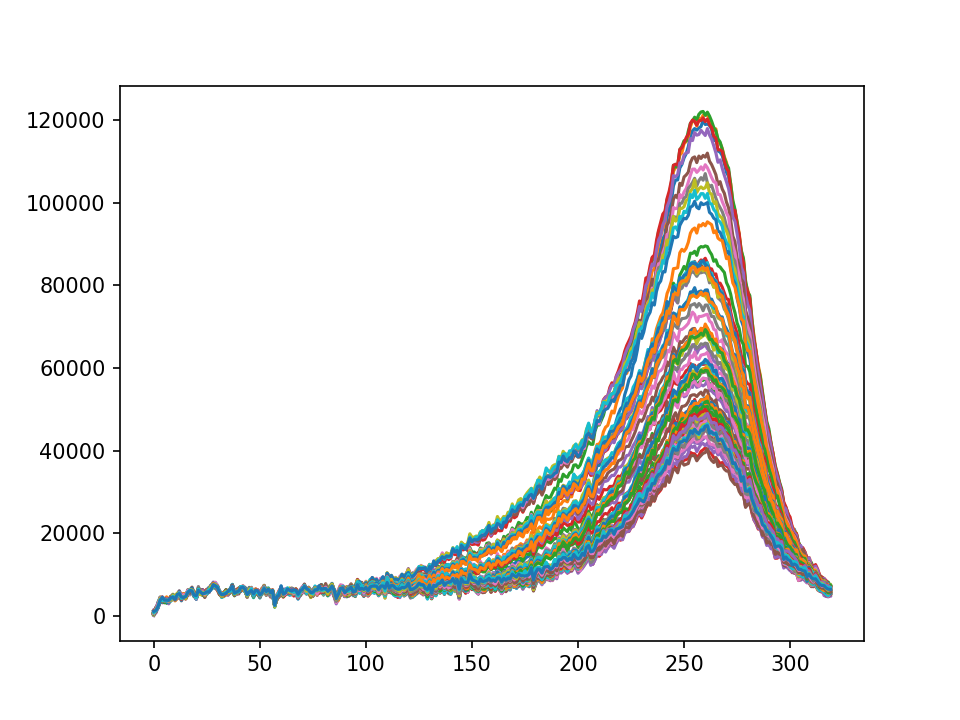

<IPython.core.display.Javascript object>


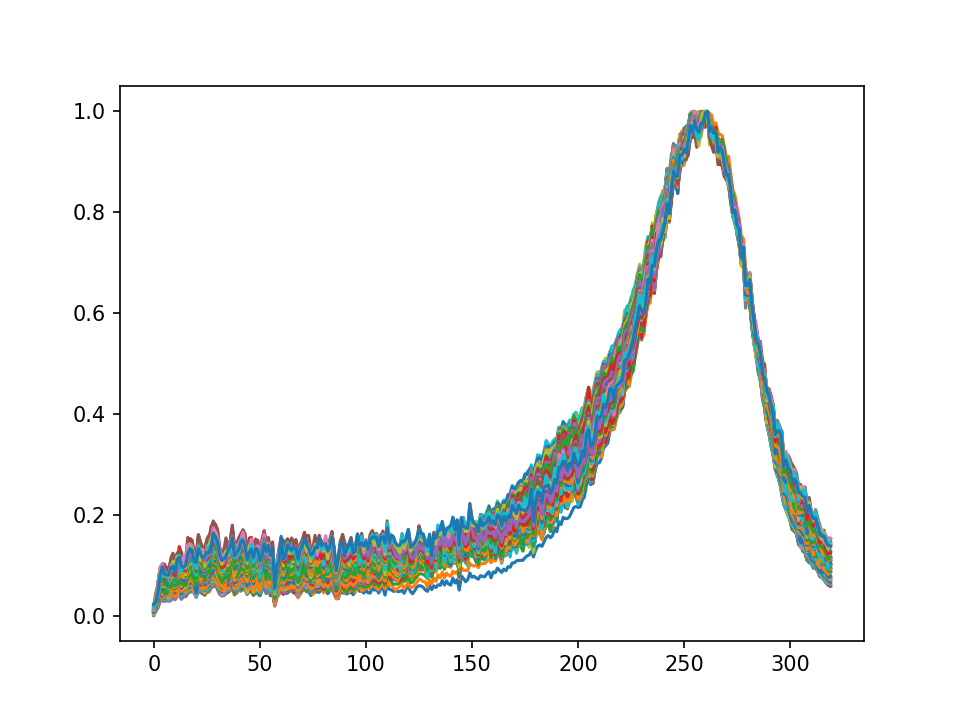

In [5]:
#access the line profile spectra directly:


#normalize the max peak to 1
yn = roi1D.data.copy()
off=np.min(yn)
for k,x in enumerate(yn) :
    yn[k] = (yn[k]-off) / np.max(yn[k]-off)


    
plt.figure()
plt.plot(roi1D.data.T -off)
plt.show()

plt.figure()
plt.plot(yn.T)
plt.show()




# preferences gui

In [6]:
hs.preferences.gui()

VBox(children=(Tab(children=(VBox(children=(HBox(children=(Label(value='Expand structures in DictionaryTreeBrowser', layout=Layout(width='auto')), Checkbox(value=True)), layout=Layout(display='flex', flex_flow='row', justify_content='space-between')), HBox(children=(Label(value='Automatic logging (requires IPython)', layout=Layout(width='auto')), Checkbox(value=False)), layout=Layout(display='flex', flex_flow='row', justify_content='space-between')), HBox(children=(Label(value='Logging level', layout=Layout(width='auto')), Dropdown(index=2, options=('CRITICAL', 'ERROR', 'WARNING', 'INFO', 'DEBUG'), value='WARNING')), layout=Layout(display='flex', flex_flow='row', justify_content='space-between')), HBox(children=(Label(value='Nb progressbar', layout=Layout(width='auto')), Checkbox(value=True)), layout=Layout(display='flex', flex_flow='row', justify_content='space-between')), HBox(children=(Label(value='Parallel', layout=Layout(width='auto')), Checkbox(value=True)), layout=Layout(display='flex', flex_flow='row', justify_content='space-between')), HBox(children=(Label(value='Show progress bar', layout=Layout(width='auto')), Checkbox(value=True)), layout=Layout(display='flex', flex_flow='row', justify_content='space-between')))), VBox(children=(HBox(children=(Label(value='Enable ipywidgets gui', layout=Layout(width='auto')), Checkbox(value=True)), layout=Layout(display='flex', flex_flow='row', justify_content='space-between')), HBox(children=(Label(value='Enable traitsui gui', layout=Layout(width='auto')), Checkbox(value=True)), layout=Layout(display='flex', flex_flow='row', justify_content='space-between')))), VBox(children=(HBox(children=(Label(value='GOS directory', layout=Layout(width='auto')), Text(value='/home/ks/.hyperspy/EELS_GOS')), layout=Layout(display='flex', flex_flow='row', justify_content='space-between')),)), VBox(children=(HBox(children=(Label(value='Azimuth angle', layout=Layout(width='auto')), FloatText(value=0.0)), layout=Layout(display='flex', flex_flow='row', justify_content='space-between')), HBox(children=(Label(value='Elevation angle', layout=Layout(width='auto')), FloatText(value=35.0)), layout=Layout(display='flex', flex_flow='row', justify_content='space-between')), HBox(children=(Label(value='Energy resolution at Mn Ka (eV)', layout=Layout(width='auto')), FloatText(value=130.0)), layout=Layout(display='flex', flex_flow='row', justify_content='space-between')), HBox(children=(Label(value='Stage tilt', layout=Layout(width='auto')), FloatText(value=0.0)), layout=Layout(display='flex', flex_flow='row', justify_content='space-between'))))), _titles={'3': 'EDS', '1': 'GUIs', '0': 'General', '2': 'EELS'}), Button(description='Save', style=ButtonStyle(), tooltip='Make changes permanent')))

# summing - averaging data

sum() without parameter - spectra for all spatial pts added:  <Signal1D, title: , dimensions: (|2560)>


<IPython.core.display.Javascript object>


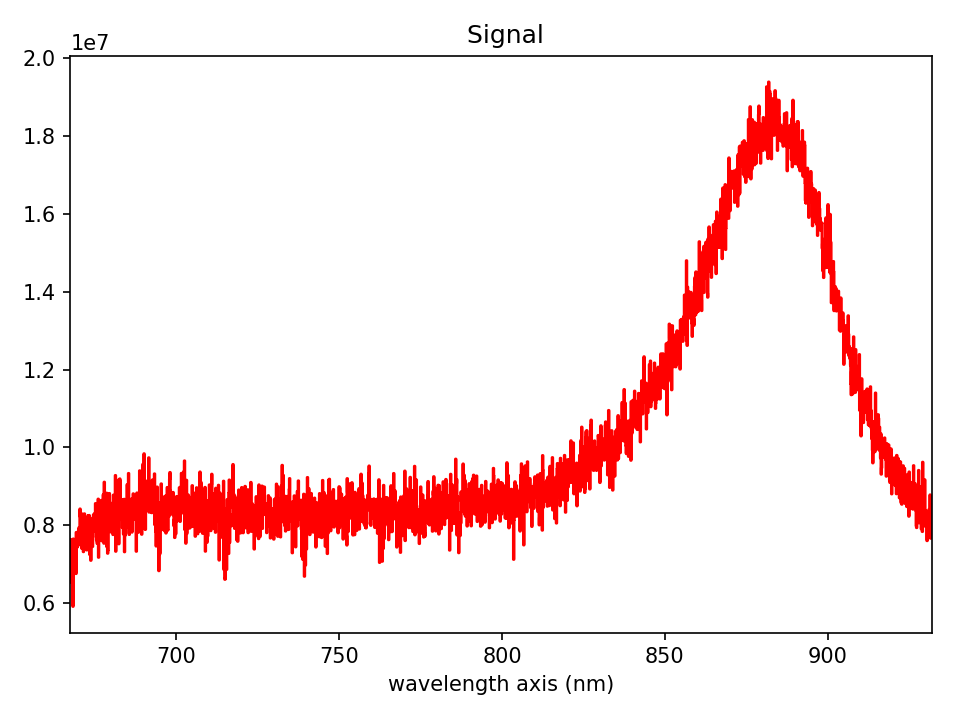

sum(2) - sum all spectral pts:  <BaseSignal, title: , dimensions: (102, 23|)>


<IPython.core.display.Javascript object>


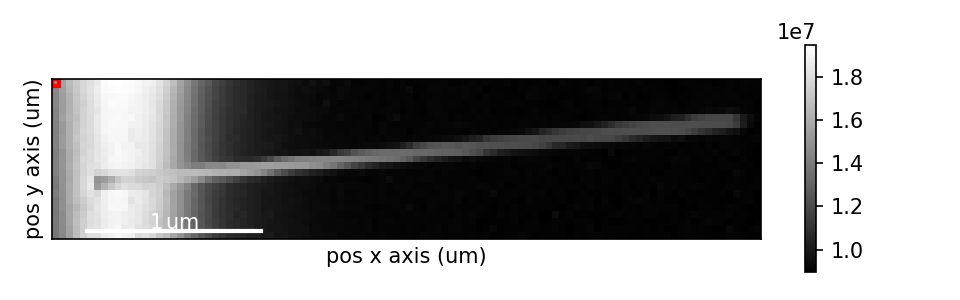

crop the spectral range and sum:


<IPython.core.display.Javascript object>


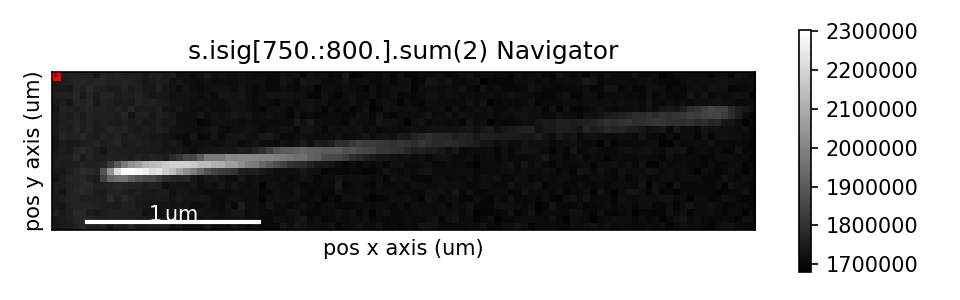

<IPython.core.display.Javascript object>


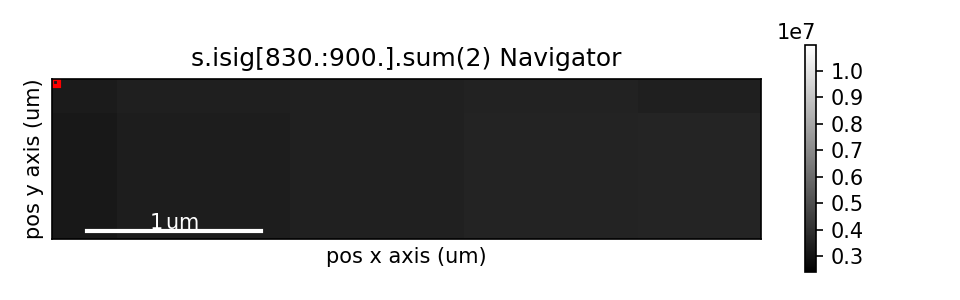

In [10]:
s = hs.load('sampledata/cltest.hspy')

s1 = s.sum()
print('sum() without parameter - spectra for all spatial pts added: ', s1)
s1.plot()

s2 = s.sum(2)
print('sum(2) - sum all spectral pts: ', s2)
s2.plot()

# s.integrate1D works very similar, difference???

# index with wavelength values!!!
sc1 = s.isig[750.:800.].sum(2)
sc2 = s.isig[830.:900.].sum(2)
print('crop the spectral range and sum:')
sc1.metadata.General.title = 's.isig[750.:800.].sum(2)'
sc2.metadata.General.title = 's.isig[830.:900.].sum(2)'
sc1.plot()
sc2.plot()

<IPython.core.display.Javascript object>


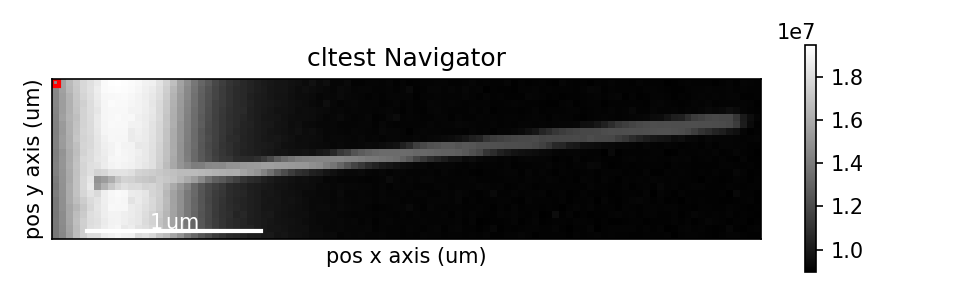

<IPython.core.display.Javascript object>


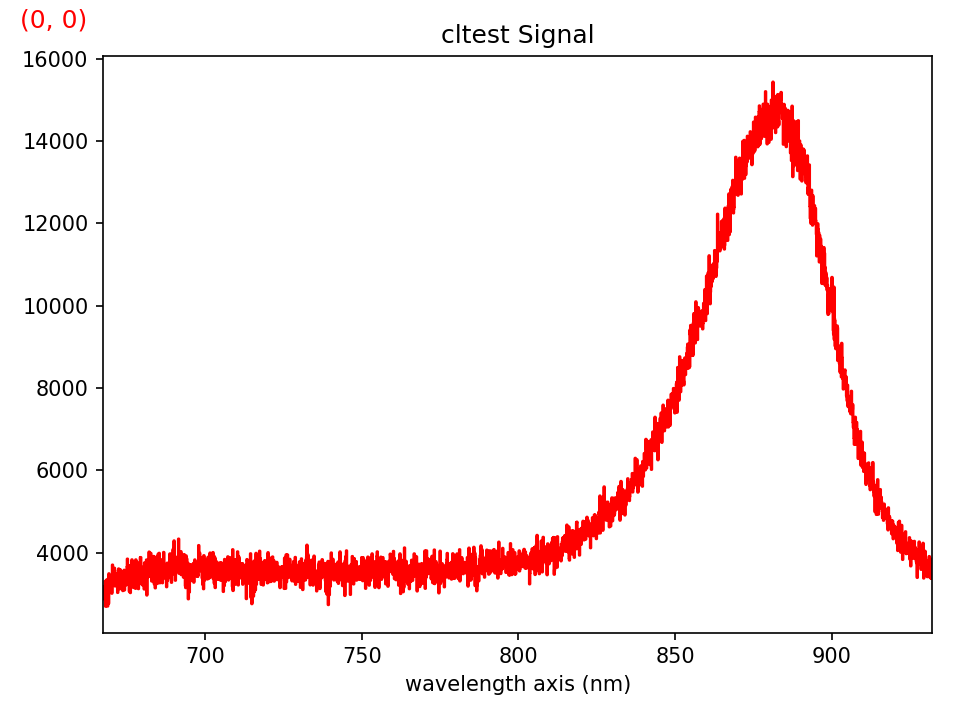

In [8]:
s.plot()

# subtracting a background spectrum

<IPython.core.display.Javascript object>


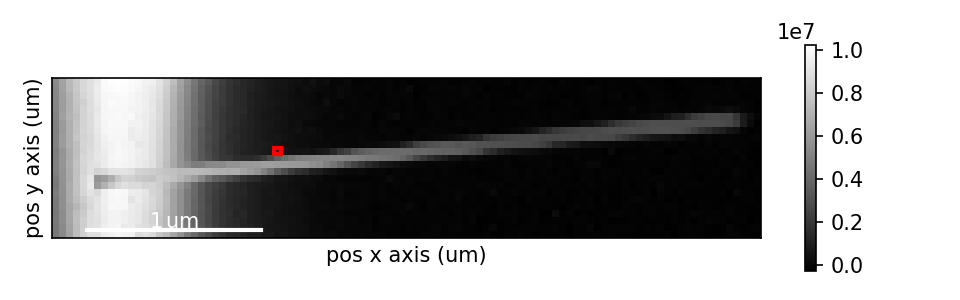

<IPython.core.display.Javascript object>


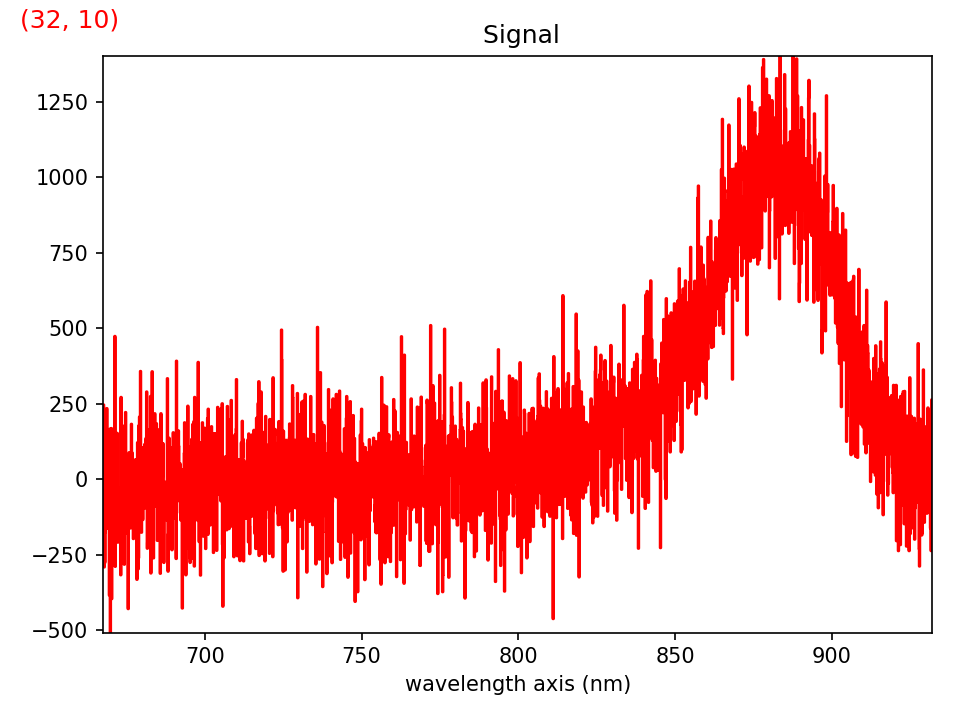

In [36]:
s = hs.load('sampledata/cltest.hspy')
# difference might get negative....
s.change_dtype('int32')

y = s.data[0,40,:]
s2 = s-y

s2.plot()



<IPython.core.display.Javascript object>


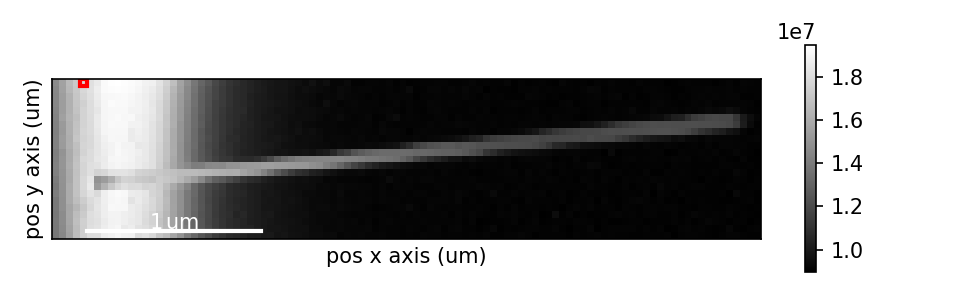

<IPython.core.display.Javascript object>


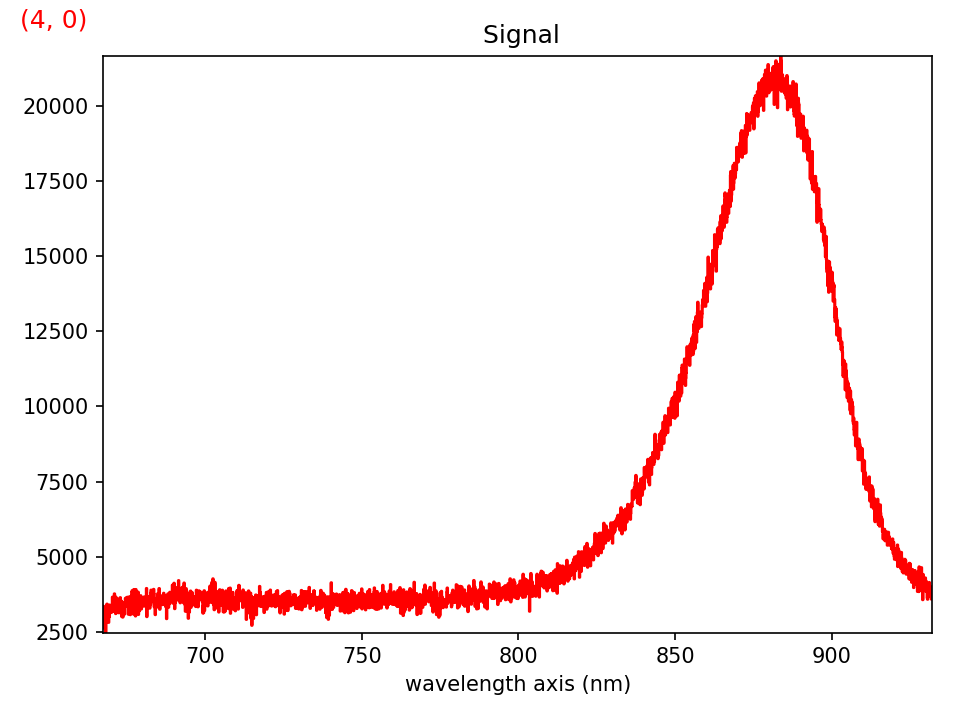

<IPython.core.display.Javascript object>


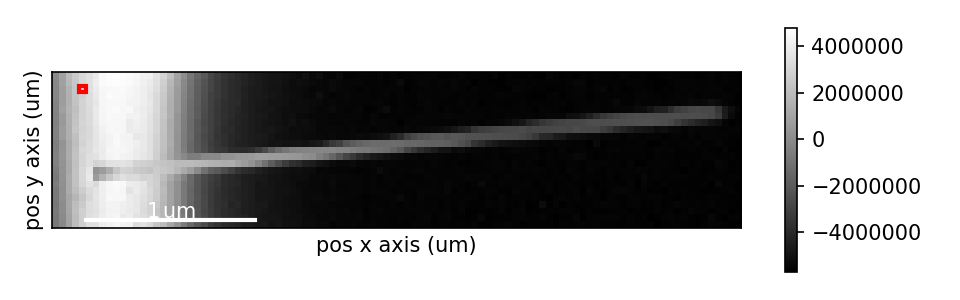

<IPython.core.display.Javascript object>


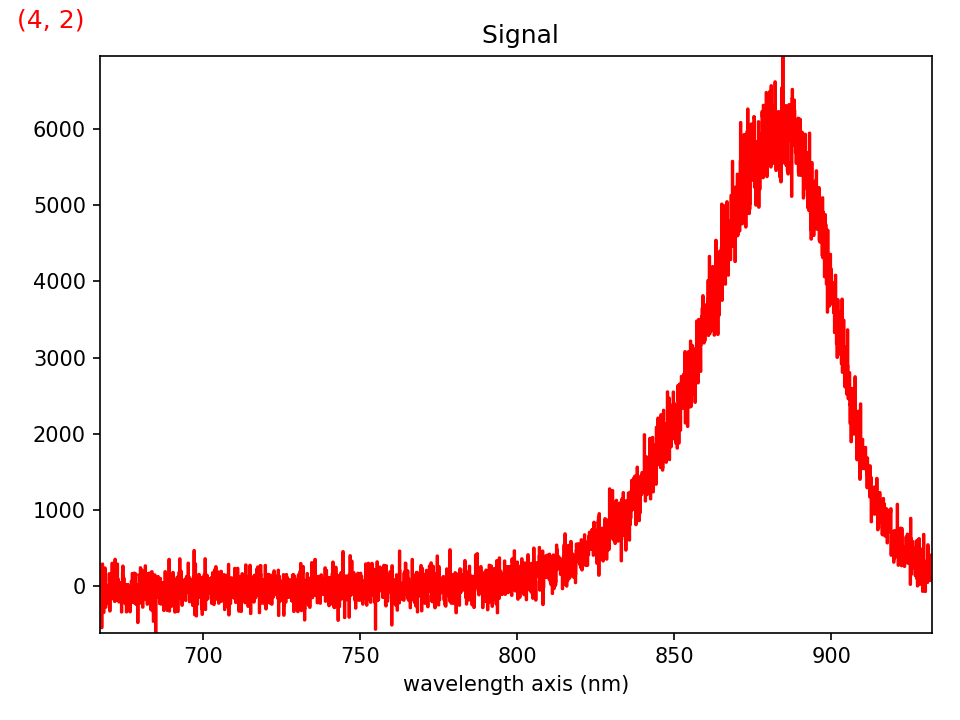

In [6]:
s = hs.load('sampledata/cltest.hspy')
# difference might get negative....
s.change_dtype('int32')
s.plot()



i = s.axes_manager.indices[0]
k = s.axes_manager.indices[1]
y = s.data[i,k,:]
s2 = s-y
s2.plot()


xi = s.axes_manager.navigation_axes[0]
xk = s.axes_manager.navigation_axes[1]

def select_backgr(obj,index) :
    global i,k,s2,s
    i = s.axes_manager.indices[0]
    k = s.axes_manager.indices[1]
    y = s.data[i,k,:]
    s2 = s-y
    s2.events.data_changed.trigger(obj=s2)
    s2.update_plot()




xi.events.index_changed.connect(select_backgr)
xk.events.index_changed.connect(select_backgr)


# this works but the plot does not reflect the changes made to s2 , why????
# run s2.plot() in a new cell to see that select_backgr has been called



<IPython.core.display.Javascript object>


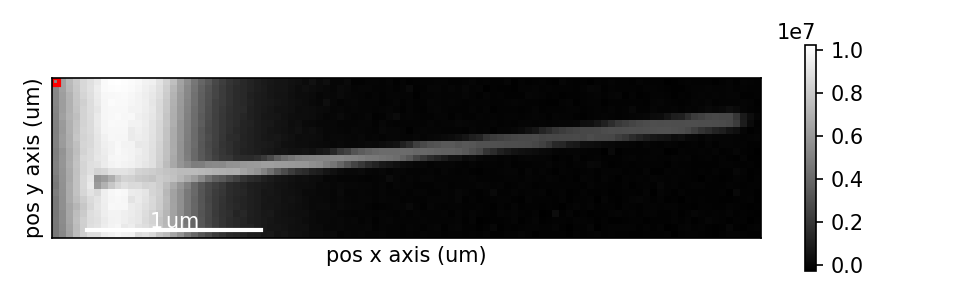

<IPython.core.display.Javascript object>


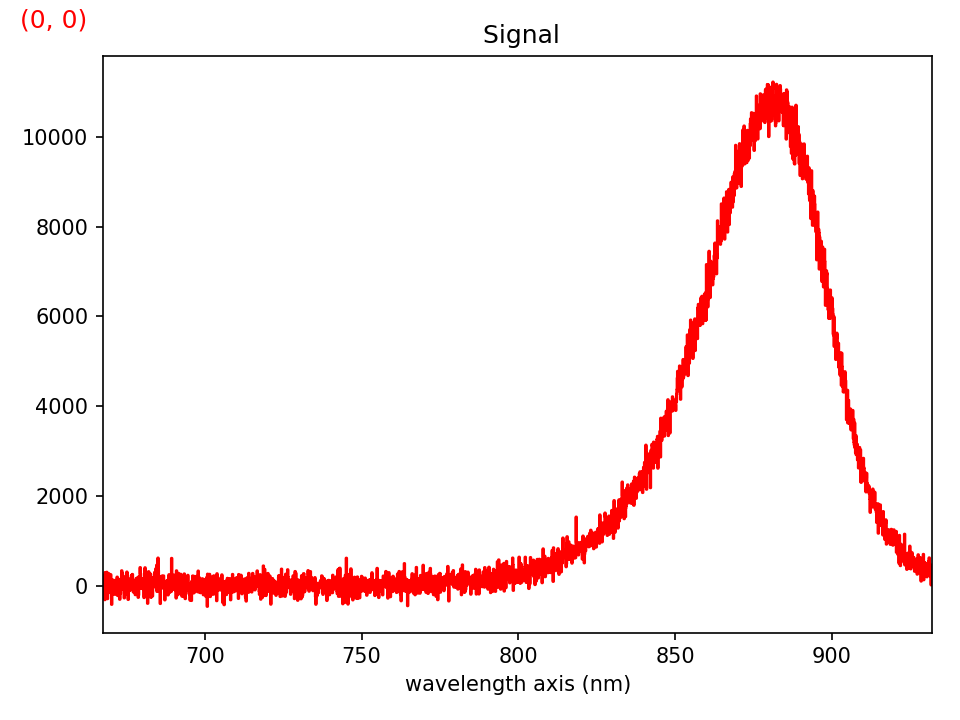

In [9]:
s = hs.load('sampledata/cltest.hspy')
# difference might get negative....
s.change_dtype('int32')

y = s.data[0,40,:]
s2 = s-y

s2.plot()



#  make custom pseudo color spectral plot

<IPython.core.display.Javascript object>


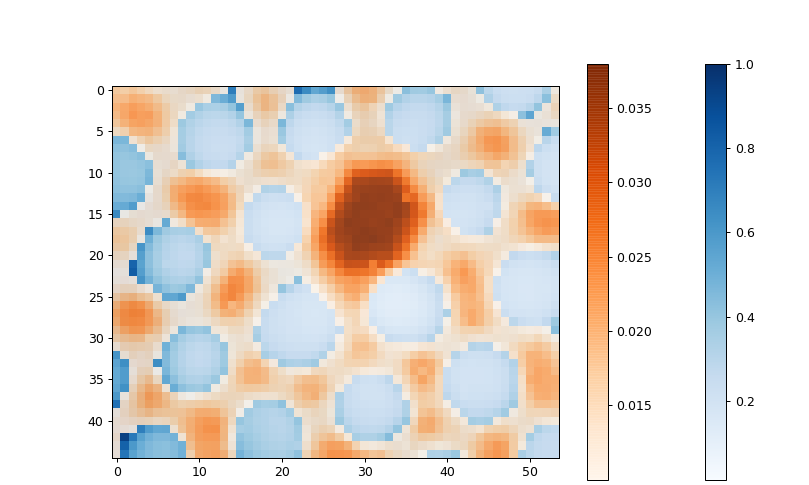

In [57]:
s = hs.load('sampledata/cltest2.hspy')
#s = odemis_to_hyperspy('sampledata/cltest2.h5',specbin=8)
#s = s.rebin(scale=[2,2,1])
#s.save('sampledata/cltest2.hspy', overwrite=True)


s.change_dtype('int32')

#y = s - s.data[0,20,:]
#subtract offset
s = s-s.data.min()


# index with wavelength values!!!
# use float ala 800. instead of 800
sc2 = s.isig[530.:580.].sum(2) 
sc1 = s.isig[430.:460.].sum(2)
# normalize to 1 @ max exciton emission
sc2 = sc2 /  sc1.data.max()
sc1 = sc1 /  sc1.data.max()
sc1.metadata.General.title = 'exciton emission'
sc2.metadata.General.title = 'defect emission'

# mask out data that is not plotted
# in this case we set a signal threshold
# the red parts are defect emission that is at least 1% of the max exciton emission
# seems reasonable here but of course customize to your spectra at hand!
sc1m = np.ma.masked_where((sc1<0.1),sc1)
sc2m = np.ma.masked_where((sc2<0.01),sc2)

#new style of matplotlib usage (more object)
fig,ax = plt.subplots(figsize=(10,6))
# exciton emission at the bottom
im1 = plt.imshow(sc1.data,cmap=plt.cm.Blues)
# plot the mask!
# defect emission on top
im2 = plt.imshow(sc2m,cmap=plt.cm.Oranges,alpha=.9)

fig.colorbar(im1)
fig.colorbar(im2)
fig.title = 'blue=exciton - red=defect' # does not show...
plt.show()



<sampledata/cltest.h5> original shape : (2560, 1, 1, 102, 23)
hyperspy shape : (23, 102, 2560)
<sampledata/cltest.h5> original shape : (1, 1, 1, 102, 23)
hyperspy shape : (23, 102)


<IPython.core.display.Javascript object>


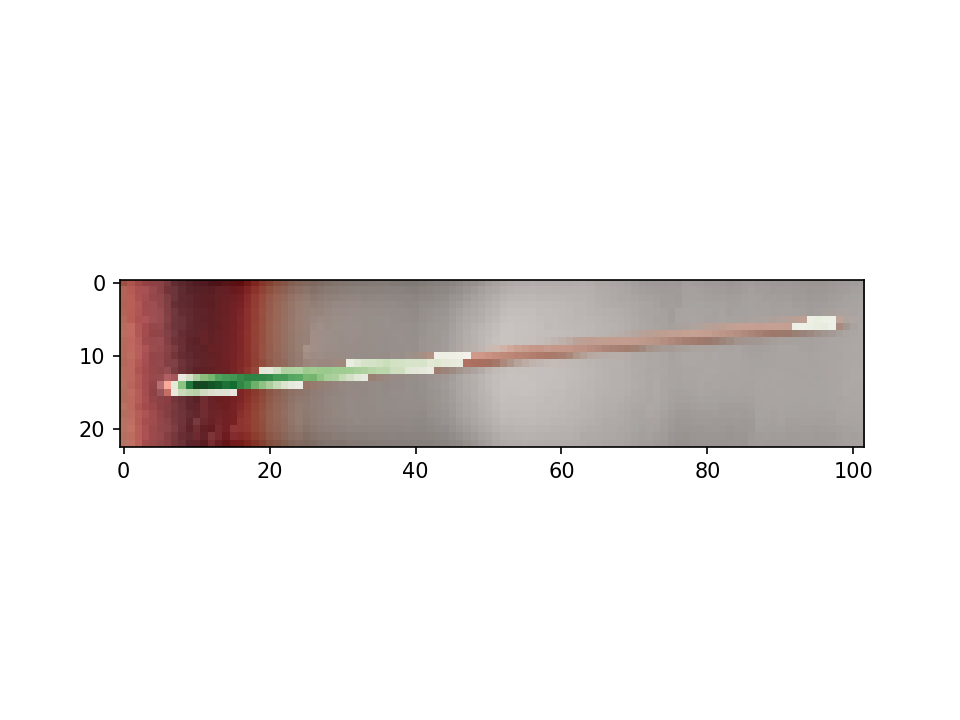

1.0

In [6]:
s = hs.load('sampledata/cltest.hspy')

s = odemis_to_hyperspy('sampledata/cltest.h5',specbin=8)
#get the SEM image as well
s2 = odemisSEM_to_hyperspy('sampledata/cltest.h5')
 

s.change_dtype('int32')
y = s.data[0,40,:]
s = s-y


# index with wavelength values!!!
sc1 = s.isig[750.:800.].sum(2) 
sc2 = s.isig[830.:900.].sum(2)
sc1 = sc1 /  sc1.data.max()
sc2 = sc2 /  sc1.data.max()
sc1.metadata.General.title = 's.isig[750.:800.].sum(2)'
sc2.metadata.General.title = 's.isig[830.:900.].sum(2)'

sc1m = np.ma.masked_where((sc1<0.2),sc1)
sc2m = np.ma.masked_where((sc2<0.05),sc2)

plt.figure()
im0 = plt.imshow(s2.data,cmap=plt.cm.Greys)
im1 = plt.imshow(sc2.data,cmap=plt.cm.Reds,alpha=0.5)
# plot the mask!
im2 = plt.imshow(sc1m,cmap=plt.cm.Greens,alpha=.9)

plt.show()

sc1.data.max()

In [16]:
# get the maximum / min signal value

s = hs.load('sampledata/cltest.hspy')

print(s.data.max())
print(s.data.min())



24808
2124


In [ ]:
s = odemis_to_hyperspy('sampledata/cltest2.h5',specbin=16) 
s.change_dtype('float')
s.decomposition()
s.decomposition()
s.plot_explained_variance_ratio()

# Apply ICA
s.blind_source_separation(3)
axes = hs.plot.plot_images(s.get_bss_loadings(), axes_decor=None, cmap='RdBu', colorbar=None)